In [1]:
import os
import pathlib as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets import get_data_home

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer

np.random.seed(1)

# Clustering End of Module Assignment 

In this notebook you will apply both k-means and hierarchical clustering. For the k-means task, you will be clustering amazon food reviews.


- [Part 1](#part1)- K-means clustering for amazon food reviews
- [Part 2](#part2)- Hierarchical clustering


[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 - K-means clustering for Amazon Food Reviews

In this part of the assignment you will be clustering reviews of food from amazon. The data span a period of more than 10 years, up to October 2012. This task will consist of loading the data, vectorizing the text input and then fitting k-means model to the data to gain insights. 

First of all, load the "Reviews.csv" dataset.

In [5]:
df = pd.read_csv('data/Reviews.csv')
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


Remove any rows of the dataframe that include NaNs using `.dropna()`. As the dataset is large, we will work with a subset of it so use `.sample()` take a sample of 10000 rows. 

In [6]:
# Remove rows with any NaN values
df_cleaned = df.dropna()

# Take a random sample of 10000 rows from the cleaned dataframe
df_sampled = df_cleaned.sample(n=10000, random_state=1)  # random_state for reproducibility


Next, use `.head` to visualise the dataframe. 

In [7]:
df_sampled.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
179242,179243,B00099XNHE,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",0,4,3,1283472000,No Microwave Directions on Box!,I look forward to cooking in the microwave...m...
424528,424529,B002HFPW6I,A1B4WA2J88XJ2F,JB,1,2,1,1327017600,Mrs. Mays...MADE IN CHINA,Read the very fine print... made in China. If...
333576,333577,B00188S3PM,ARXU7TM4XXI1D,"Emma M. Diaz ""Emma R.""",3,3,5,1332288000,No more breast milk!,Let me start off by saying that I am not a tea...
305748,305749,B001EPPBMW,A12XZV84IPFA3F,Rodrigo,0,0,4,1330905600,Muy bueno,Soy argentino y puedo decir que este es un muy...
492640,492641,B00370CFR6,A2OCDZG8FYWIKE,Nascar88girl,0,0,5,1347148800,Green Mountain's Wild Mountain Blueberry Coffee,I was first hooked on Timothy's German Chocola...


 Next we want to create a variable `texts` which is only the `'Text'` Column of the dataset.

In [8]:
texts = df_sampled['Text']

We will use the `TfidfVectorizer` to turn the strings into a vectorized format. 

This method allows us to convert the text into a vectorized format that the computer can understand. This particular method also weights for word frequency, so we don't put too much emphasis on common words such as "the", "a" and "and". 

You can read more about this method in the sci-kit learn documentation.

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(texts) # convert our texts into vectors


Below, use the elbow curve method with cluster up to 15 to decide how many clusters you will use. 

C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


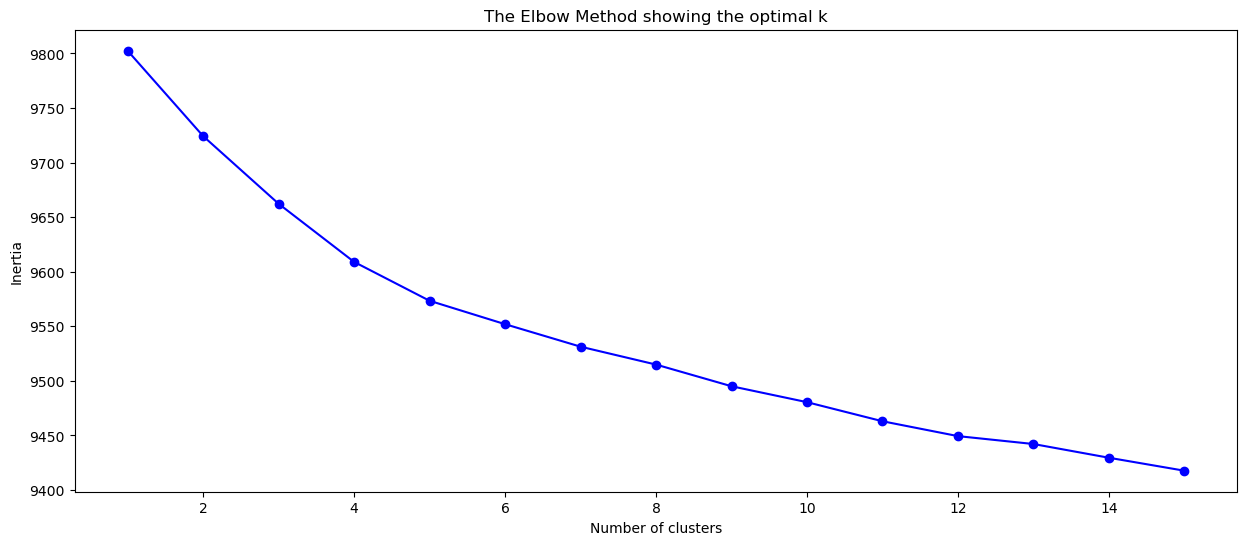

In [10]:
# Calculate the elbow curve
inertia = []
K = range(1, 16)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

How many clusters did you decide to use and Why?

**4, the decline rate is more gradual. **


Now fit a Kmeans model for your chosen number of clusters 

In [16]:

k = 4  # the chosen number of clusters

# Fit the KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# The output here would be the fitted KMeans model
kmeans

KMeans(n_clusters=4, random_state=42)

We will now make a wordcloud of the most common words in each cluster. For this part you will need to install the wordcloud package on your computer. To do this go to your command line and enter the command `pip install wordcloud`.

In [13]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


The two functions below will allow you to plot the wordclouds easily 

In [17]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

Use the code cell below to create wordclouds for each cluster. What are the significant clusters you see? 

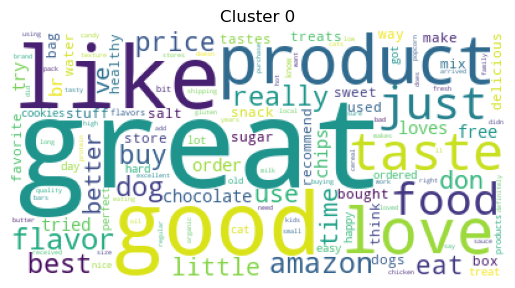

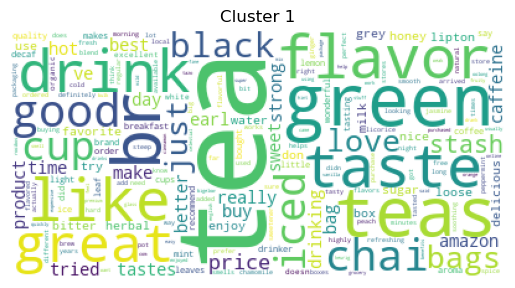

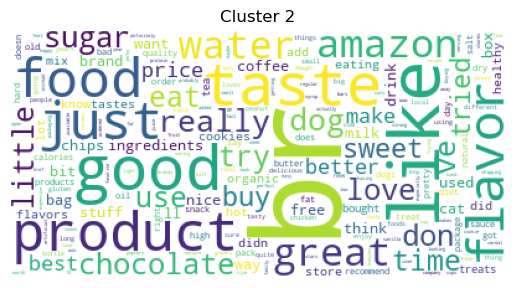

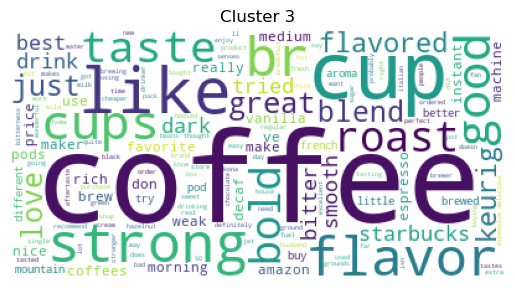

In [20]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)



What do you notice about the cluster? What would you say the main clusters are?

**Some word cloud are bigger than others. The main clusters are great, tea, coffer, br**

Give an example of how this type of clustering could be useful in your industry

**Can be used to analyse text data associated with transactions, customer communidation, or other relevent sources in anomaly detection. And it can provide a visual representation of the most frequent terms used within those groups.**

[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - Hierarchical Clustering

In this part of the assignment you will be clustering Airbnb data from new york. This dataset includes the following factors:

- price - price in dollars
- minimum_nights - the minimum number of nights a guest can stay
- number_of_reviews - the number of reviews the listing has
- reviews_per_month - the number of reviews it has got per month
- calculated_host_listings_count - the number of listings the host has
- availability_365 - how many days a year it is available 

First of all load the `AB_NYC.csv` dataset and use `.head()` to see what it looks like. 

In [21]:
df_airbnb = pd.read_csv('data/AB_NYC.csv')
df_airbnb.head(10)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,140,2,37,2.64,1,157
1,90,3,8,0.32,1,0
2,225,2,3,0.09,1,88
3,47,1,18,0.80,1,0
4,155,20,25,1.06,2,62
5,157,4,54,0.66,2,12
6,150,3,28,2.58,2,57
7,130,2,3,3.00,3,132
8,40,1,1,1.00,3,179
9,75,1,2,1.82,7,362


Next use `normalize` to normalize the data. You'll need to pass the argument `axis=1` to the normalize function so it normalizes each column seperately. 

In [23]:
from sklearn.preprocessing import normalize


# Normalize the data along axis=1 (columns)
data_scaled = normalize(df_airbnb, axis=1)

# Convert the normalized data back to a DataFrame with the same column names
data_scaled = pd.DataFrame(data_scaled, columns=df_airbnb.columns)

Next make a dendrogram from the data. 

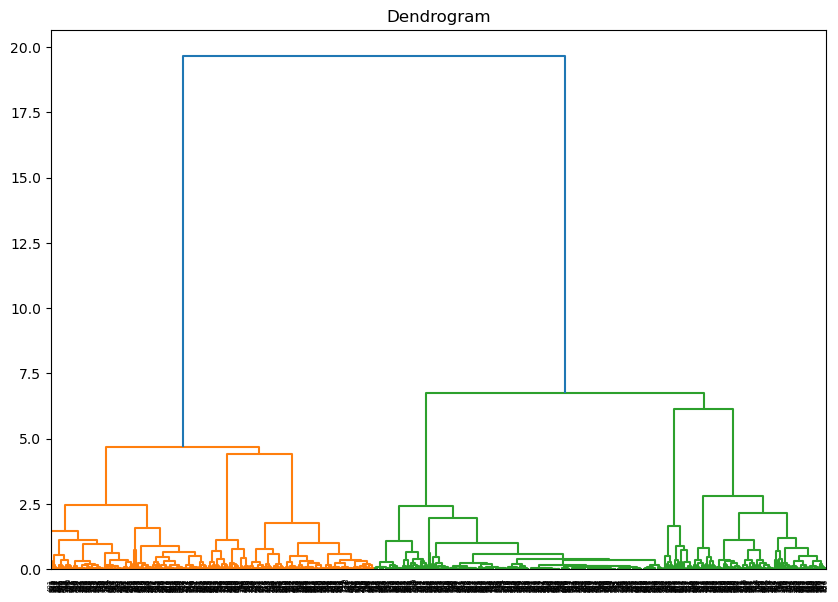

In [24]:
import matplotlib as mpl
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

How many clusters would you choose and why? 

**2**


Now use `AgglomerativeClustering` to create your selected number of clusters. What distance metric would you use and why?


**My dataset was normalised, I am using Euclidean distance as the distance metric. This is the most common choice when the magnitudes of the data points are important. It measures the straight-line distance between two points in Euclidean space and the scales of the different features are comparable. **

In [25]:
from sklearn.cluster import AgglomerativeClustering

# Set the parameters as specified
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Apply the clustering to the data using fit_predict
cluster_labels = cluster.fit_predict(data_scaled)

C:\Users\jdche\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Use the cell below to visualise the clusters 


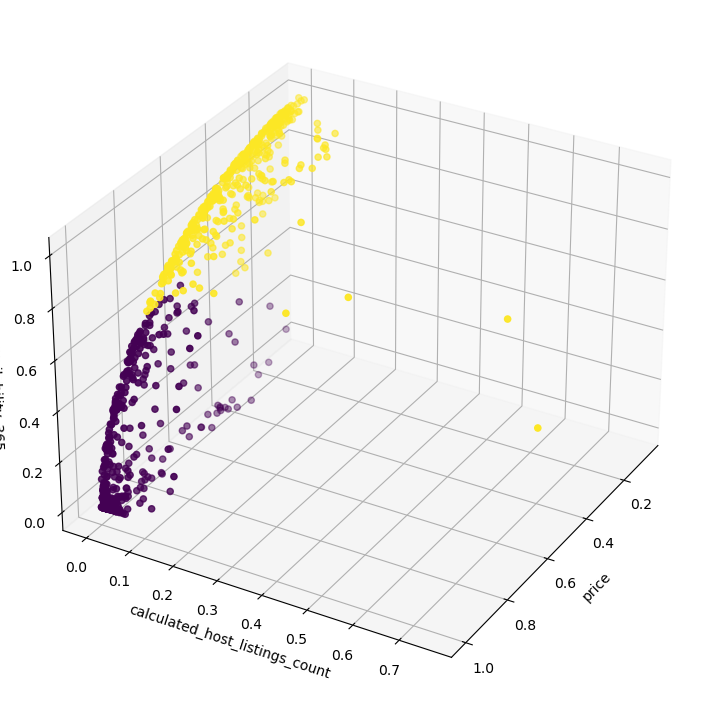

Text(0.5, 0, 'availability_365')

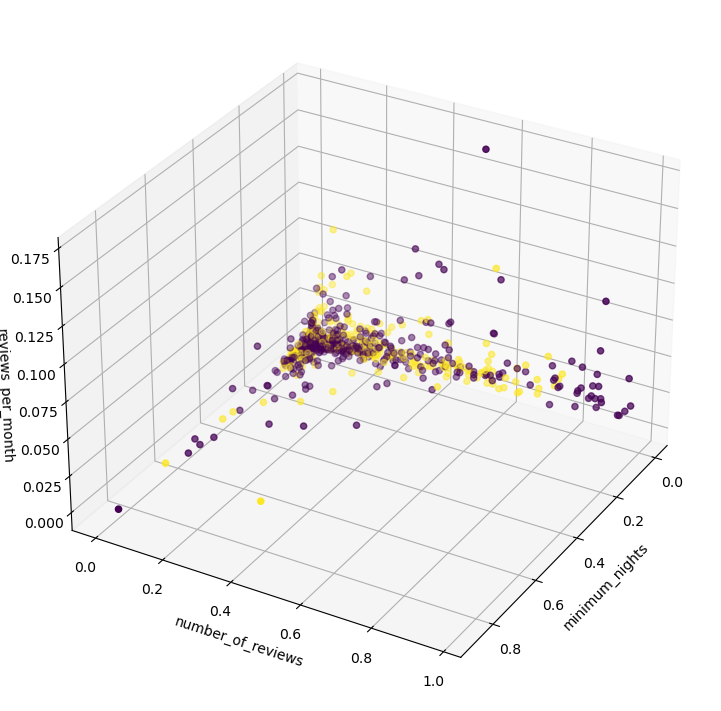

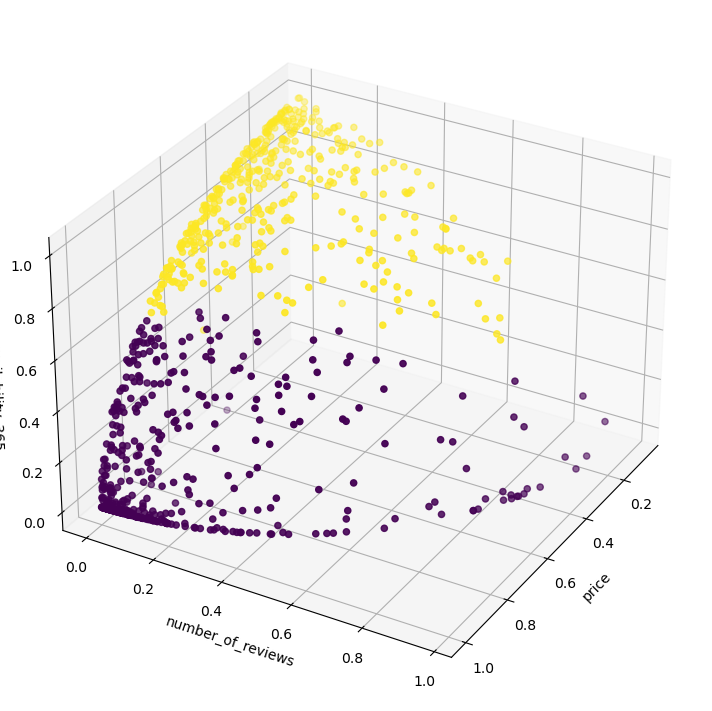

In [26]:
fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')
ax.scatter3D(data_scaled['price'],data_scaled['calculated_host_listings_count'
             ],data_scaled['availability_365'], c=cluster.labels_)
ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('calculated_host_listings_count')
ax.set_zlabel('availability_365')
plt.show()

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['minimum_nights'], data_scaled['number_of_reviews'
             ],data_scaled['reviews_per_month'], c=cluster.labels_)
ax.view_init(30,30)
ax.set_xlabel('minimum_nights')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('reviews_per_month')

fig = plt.figure(figsize=(10, 7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.scatter3D(data_scaled['price'], data_scaled['number_of_reviews'
             ],data_scaled['availability_365'], c=cluster.labels_)

ax.view_init(30, 30)
ax.set_xlabel('price')
ax.set_ylabel('number_of_reviews')
ax.set_zlabel('availability_365')

add a new column to your data dataframe called `cluster` for the cluster labels. Then use the pandas `groupby()` function to calculate the mean of each cluster. 

In [29]:

# Assuming you have cluster labels stored in a 'cluster_labels' variable
data_scaled['cluster'] = cluster_labels

# Now, you can use the groupby() function to calculate the mean for each cluster
cluster_means = data_scaled.groupby('cluster').mean()

In [30]:
print(cluster_means)

            price  minimum_nights  number_of_reviews  reviews_per_month  \
cluster                                                                   
0        0.924344        0.040936           0.143175           0.008592   
1        0.404604        0.029298           0.144560           0.007926   

         calculated_host_listings_count  availability_365  
cluster                                                    
0                              0.013611           0.13085  
1                              0.021776           0.85507  


How would you describe the different clusters? What is different about them?

**These clusters represent different types of accommodations or host behaviors within my dataset.
Cluster 0 represents properties with higher prices, longer minimum night stays, fewer listings per host and lower availability. 
Cluster 1 represents properties with lower prices, slightly shorter minimum night stays, more listings per host, higher availability, and similar review levels.

** 

Congrats you've finished the Module 15 Assignment!